## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis
#### 4. Performance improvement after removing outliers

***
***
#### Hypothesis: If a country has a higher number of young pleople enrolled in school then its poverty level will be lower.
***
***

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\06 Advanced Analytics and Dashboard Design\00 Data\World Bank Cleaned'

In [4]:
df = pd.read_csv(os.path.join(path, 'eco_edu_pov.csv'))

### Data checks

In [5]:
df.head()

,Unnamed: 0,Country Name,Year,GDP per capita (constant 2015 US$),GDP per capita growth (annual %),GNI per capita (constant 2015 US$),GNI per capita growth (annual %),Adolescents out of school (% of lower secondary school age),"Adolescents out of school, female (% of female lower secondary school age)","Adolescents out of school, male (% of male lower secondary school age)",...,"School enrollment, primary, female (% net)","School enrollment, primary, male (% net)","School enrollment, secondary (% net)","School enrollment, secondary, female (% net)","School enrollment, secondary, male (% net)",Gini index,Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population)
0,0,Afghanistan,1996,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
1,1,Afghanistan,1997,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
2,2,Afghanistan,1998,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
3,3,Afghanistan,1999,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7
4,4,Afghanistan,2000,359.766116,0.927029,597.832321,NaN,NaN,NaN,NaN,...,NaN,NaN,26.55995,14.40342,37.98502,NaN,NaN,NaN,NaN,33.7


##### Extreme values checks

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


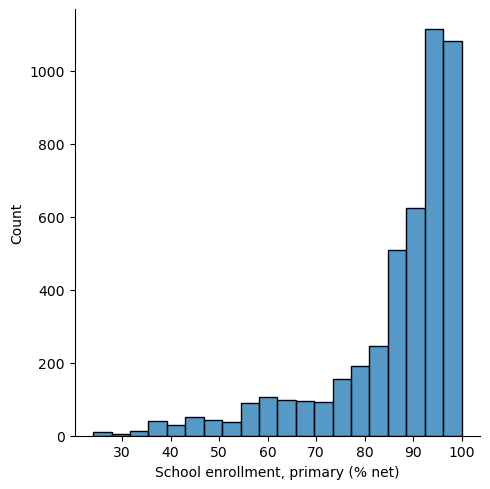

In [6]:
sns.displot(df['School enrollment, primary (% net)'], bins=20) # check the distribution of data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


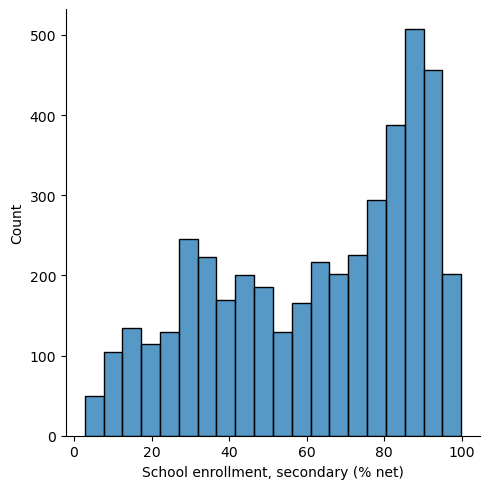

In [7]:
sns.displot(df['School enrollment, secondary (% net)'], bins=20) # check the distribution of data

### 3. Data prep for regression analysis 

In [8]:
# Create a subframe with the test columns
subframe = df[df['Year'] == 2015][['School enrollment, secondary (% net)', 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)']]


# Remove NaN rows from dataframe
subframe = subframe[subframe['School enrollment, secondary (% net)'].notna()]
subframe = subframe[subframe['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].notna()]

subframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 45 to 4751
Data columns (total 2 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   School enrollment, secondary (% net)                                 164 non-null    float64
 1   Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)  164 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


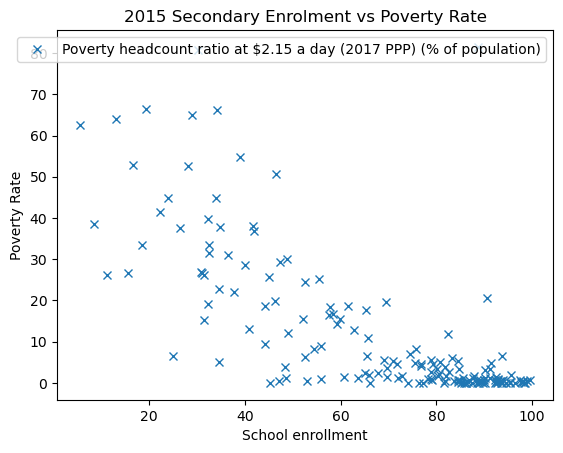

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

subframe.plot(x = 'School enrollment, secondary (% net)', y='Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',style='x')
plt.title('2015 Secondary Enrolment vs Poverty Rate')  
plt.xlabel('School enrollment')  
plt.ylabel('Poverty Rate')  
plt.show()

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = subframe['School enrollment, secondary (% net)'].values.reshape(-1,1)
y = subframe['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].values.reshape(-1,1)

In [11]:
X

array([[87.38842   ],
       [52.9321    ],
       [11.29064   ],
       [88.44048   ],
       [87.74122   ],
       [93.23812   ],
       [86.71155   ],
       [88.53256   ],
       [59.13634   ],
       [98.50839   ],
       [93.65346   ],
       [69.39745   ],
       [46.58049   ],
       [63.7082    ],
       [76.68761   ],
       [59.78544   ],
       [81.68909   ],
       [91.22931   ],
       [26.53378   ],
       [28.89895   ],
       [71.74531   ],
       [45.01617   ],
       [92.4135    ],
       [13.077202  ],
       [18.44135   ],
       [88.96612   ],
       [75.60237   ],
       [44.17186667],
       [80.32835   ],
       [32.42823   ],
       [92.24036   ],
       [94.63238   ],
       [90.16472   ],
       [89.39882   ],
       [37.8168    ],
       [67.83227   ],
       [78.92814   ],
       [84.72536   ],
       [78.77816   ],
       [65.16322   ],
       [93.82438   ],
       [41.69996   ],
       [30.8138    ],
       [90.22944   ],
       [84.52339   ],
       [95

In [12]:
y

array([[ 0.1       ],
       [ 0.5       ],
       [26.15      ],
       [ 0.65      ],
       [ 1.1       ],
       [ 0.5       ],
       [ 0.7       ],
       [ 0.        ],
       [14.28333333],
       [ 0.        ],
       [ 0.1       ],
       [19.6       ],
       [50.7       ],
       [ 1.22      ],
       [ 4.6       ],
       [15.4       ],
       [ 3.9       ],
       [ 3.4       ],
       [37.5       ],
       [65.1       ],
       [ 4.6       ],
       [25.7       ],
       [ 0.2       ],
       [63.94615385],
       [33.34285714],
       [ 0.4       ],
       [ 4.9       ],
       [18.6       ],
       [ 1.6       ],
       [33.4       ],
       [ 0.6       ],
       [ 0.        ],
       [ 0.        ],
       [ 0.2       ],
       [22.        ],
       [ 2.5       ],
       [ 2.7       ],
       [ 3.4       ],
       [ 0.9       ],
       [ 2.3       ],
       [ 0.6       ],
       [37.98571429],
       [27.        ],
       [ 3.1       ],
       [ 0.7       ],
       [ 0

In [13]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

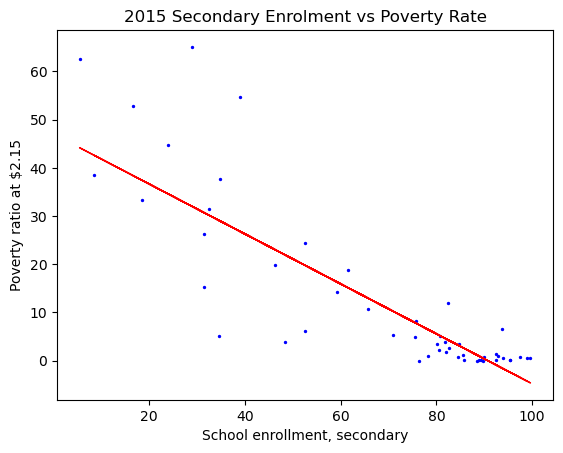

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 2)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 1)
plot_test.title('2015 Secondary Enrolment vs Poverty Rate')
plot_test.xlabel('School enrollment, secondary')
plot_test.ylabel('Poverty ratio at $2.15')
plot_test.show()

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.51848058]]
Mean squared error:  88.25819584904198
R2 score:  0.7236458426690184


In [20]:
y_predicted

array([[26.83468116],
       [30.76450285],
       [21.92355355],
       [ 1.12654068],
       [ 5.53715643],
       [ 0.43118046],
       [28.983548  ],
       [-2.36350243],
       [ 7.83059304],
       [ 3.20521745],
       [30.69707445],
       [ 7.41674703],
       [44.18559031],
       [-0.9277312 ],
       [ 0.94364666],
       [ 2.69494443],
       [ 3.10049993],
       [38.40465633],
       [19.80017338],
       [23.01755448],
       [29.09015798],
       [-4.63329632],
       [ 0.6774017 ],
       [ 4.33738719],
       [ 4.47482084],
       [16.36790975],
       [ 2.60743527],
       [42.59232543],
       [19.73472558],
       [30.17366313],
       [ 0.5033737 ],
       [15.07423331],
       [ 4.13896986],
       [37.46747158],
       [34.61705203],
       [-1.07110664],
       [32.04540911],
       [10.24211878],
       [ 5.13791602],
       [ 4.67474695],
       [ 7.74272095],
       [-2.46712077],
       [-1.61716519],
       [-4.29624765],
       [-0.88565132],
       [12

In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,54.700000,26.834681
1,26.200000,30.764503
2,3.900000,21.923554
3,0.000000,1.126541
4,3.450000,5.537156
5,0.800000,0.431180
6,37.700000,28.983548
7,0.100000,-2.363502
8,4.900000,7.830593
9,0.700000,3.205217


##### Compare how the regression fits the training set

In [22]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.51848058]]
Mean squared error:  177.481083738385
R2 score:  0.4617131661037158


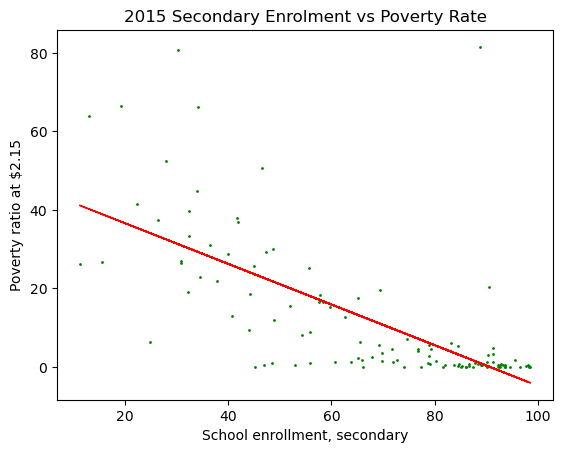

In [25]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 1)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =1)
plot_test.title('2015 Secondary Enrolment vs Poverty Rate')
plot_test.xlabel('School enrollment, secondary')
plot_test.ylabel('Poverty ratio at $2.15')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [26]:
# calculate IQR for column Height
Q1 = subframe['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].quantile(0.25)
Q3 = subframe['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].quantile(0.75)
IQR = Q3 - Q1

# Keep values between outlier boundaries
threshold = 1.5
subframe = subframe[(subframe['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'] >= Q1 - threshold * IQR) &
                    (subframe['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'] <= Q3 + threshold * IQR)]

In [27]:
# calculate IQR for column Height
Q1 = subframe['School enrollment, secondary (% net)'].quantile(0.25)
Q3 = subframe['School enrollment, secondary (% net)'].quantile(0.75)
IQR = Q3 - Q1

# Keep values between outlier boundaries
threshold = 1.5
subframe = subframe[(subframe['School enrollment, secondary (% net)'] >= Q1 - threshold * IQR) &
                    (subframe['School enrollment, secondary (% net)'] <= Q3 + threshold * IQR)]

In [28]:
subframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 45 to 4751
Data columns (total 2 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   School enrollment, secondary (% net)                                 153 non-null    float64
 1   Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)  153 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


In [29]:
subframe.shape

(153, 2)

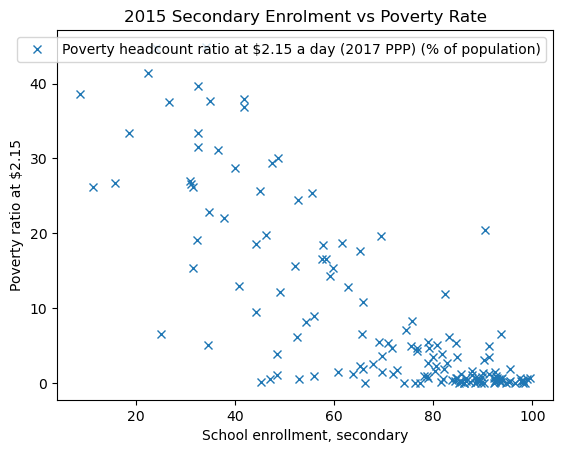

In [30]:
# See how the scatterplot looks without outliers.

subframe.plot(x = 'School enrollment, secondary (% net)', y='Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)', style='x')  
plot_test.title('2015 Secondary Enrolment vs Poverty Rate')
plot_test.xlabel('School enrollment, secondary')
plot_test.ylabel('Poverty ratio at $2.15')
plt.show()

In [31]:
# Reshape again.

X_2 = subframe['School enrollment, secondary (% net)'].values.reshape(-1,1)
y_2 = subframe['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'].values.reshape(-1,1)

In [32]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [33]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [34]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [35]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.40934804]]
Mean squared error:  37.067306852149
R2 score:  0.6636374007712669


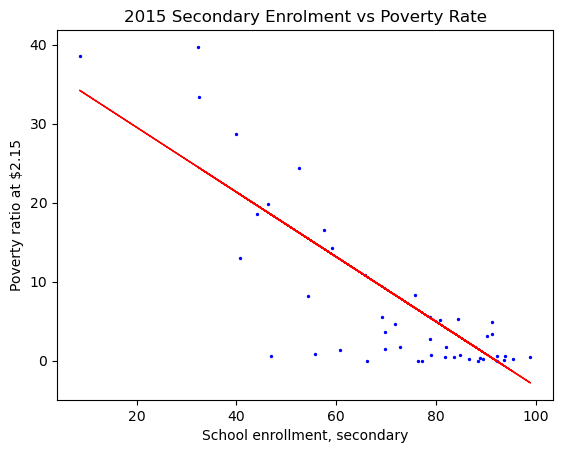

In [37]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='blue', s = 2)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth = 1)
plot_test.title('2015 Secondary Enrolment vs Poverty Rate')
plot_test.xlabel('School enrollment, secondary')
plot_test.ylabel('Poverty ratio at $2.15')
plot_test.show()

### Interpretation:
The regression line fits the shape of the test data when plotted. The large r2 value (0.66) means that the correlation is strong, but the RMSE value (37) is mid-ranged compared to the data itself. This means that whilst the regression calculation can give a good idea as to if the poverty level is low or high when given the education enrolment rate, the it will not accurately predict the actual enrolment rate.

The graph showing the regression line agaist the test data shows us that these data points for the lowest education enrolment rates are above the regression line, indicating higher than predicted poverty levels. And, as the enrolment rate increases the model is more likely to overpredict the rate of poverty. This means that the linear regression model is not the best for predicting the results of these data, the affect of education and poverty rates is likely more extreeme than the model has assessed.

A negative exponential or polynomial relationship is more liekly to give an accurate prediction than the linear model used.